In [259]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import pandas as pd
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing
from keras.utils import np_utils
from keras import optimizers

train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/test.csv")
train = train.append(test) ## test 데이터도 학습에 이용.

# inplace=True 로 해야 모든 컬럼에 대해 fillna 가 이뤄짐.
# train.fillna(0, inplace=True) 
# test.fillna(0, inplace=True)


print(train.shape)
print(test.shape)

train



(1309, 12)
(418, 11)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [260]:

# cols = PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

# 데이터 전처리 : 학습에 필요없는 column 제거.
train.pop('Name'), test.pop('Name')
train.pop('Ticket'), test.pop('Ticket')
train.pop('Cabin'), test.pop('Cabin')
train.pop('PassengerId'), test.pop('PassengerId') # 제거하지 않으면 passengerId 가 높을수록 predicton value 가 높은 현상

# train 은 Nan data 제거하고, test 는 row 수를 유지하기 위해 drop 대신 fill.
train.dropna(inplace=True)
test.fillna(0, inplace=True)
print(train.shape)
print(test.shape)

# 데이터 전처리 : One Hot Encoding
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
enc = encoder.fit(train[['Embarked']].astype(str))
train = pd.merge(train, pd.DataFrame(enc.transform(train[['Embarked']].astype(str))) , right_index=True, left_index=True)
test = pd.merge(test, pd.DataFrame(enc.transform(test[['Embarked']].astype(str))) , right_index=True, left_index=True)
enc = encoder.fit(train[['Sex']].astype(str))
train = pd.merge(train, pd.DataFrame(enc.transform(train[['Sex']].astype(str))) , right_index=True, left_index=True)
test = pd.merge(test, pd.DataFrame(enc.transform(test[['Sex']].astype(str))) , right_index=True, left_index=True)
train.pop('Embarked'), test.pop('Embarked')
train.pop('Sex'), test.pop('Sex')

# label
y_train = train[['Survived']]

# feature
train.pop('Survived')
x_train = train
x_test = test

x_train.head(5)



(712, 8)
(418, 7)


,Age,Fare,Parch,Pclass,SibSp,0_x,1,2,0_y
0,22.0,7.2500,0,3,1,0,0,1,1
1,38.0,71.2833,0,1,1,1,0,0,0
2,26.0,7.9250,0,3,0,0,0,1,0
3,35.0,53.1000,0,1,1,0,0,1,0
4,35.0,8.0500,0,3,0,0,0,1,1


In [264]:
# #### outlier detection #####
# from sklearn.cluster import DBSCAN
# outlier_detection = DBSCAN(
#     eps = 50,
#     metric="euclidean",
#     n_jobs = -1)
# clusters = outlier_detection.fit_predict(train[['Fare']])
# clusters

In [265]:
live = len(y_train[y_train['Survived']==1])
death = len(y_train[y_train['Survived']==0])
print("live : " , live)
print("death : " , death)
print(
    "생존률 : " , live / (live + death)
)
y_train.head(5)

live :  182
death :  264
생존률 :  0.4080717488789238


,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [266]:
x_test.head(5)

,Pclass,Age,SibSp,Parch,Fare,0_x,1,2,0_y
0,3,34.5,0,0,7.8292,0,1,0,1
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1
3,3,27.0,0,0,8.6625,0,0,1,1
4,3,22.0,1,1,12.2875,0,0,1,0


In [285]:

model = Sequential()
model.add(Dense(100, kernel_initializer = 'uniform',activation='relu', input_dim=len(x_train.columns)))
model.add(Dropout(0.1))
model.add(Dense(10, kernel_initializer = 'uniform',activation='softmax'))
model.add(Dense(10, kernel_initializer = 'uniform',activation='softmax'))
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

# opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# opt = optimizers.Adam(lr=0.001, beta_1=0.5, beta_2=0.99, epsilon=None, decay=0.0, amsgrad=False)
opt = optimizers.Adam(lr=0.001, amsgrad=True)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

print(model.summary)

hist = model.fit(x_train, y_train, epochs=500, batch_size=5,validation_split=0.1)



<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x1a37b5a908>>
Train on 401 samples, validate on 45 samples
Epoch 1/500
401/401 [==============================] - 2s 5ms/step - loss: 0.6890 - acc: 0.6060 - val_loss: 0.6965 - val_acc: 0.4667
Epoch 2/500
401/401 [==============================] - 0s 587us/step - loss: 0.6834 - acc: 0.6060 - val_loss: 0.6995 - val_acc: 0.4667
Epoch 3/500
401/401 [==============================] - 0s 589us/step - loss: 0.6797 - acc: 0.6060 - val_loss: 0.7027 - val_acc: 0.4667
Epoch 4/500
401/401 [==============================] - 0s 594us/step - loss: 0.6768 - acc: 0.6060 - val_loss: 0.7056 - val_acc: 0.4667
Epoch 5/500
401/401 [==============================] - 0s 585us/step - loss: 0.6745 - acc: 0.6060 - val_loss: 0.7085 - val_acc: 0.4667
Epoch 6/500
401/401 [==============================] - 0s 589us/step - loss: 0.6724 - acc: 0.6060 - val_loss: 0.7102 - val_acc: 0.4667
Epoch 7/500
401/401 [==============================] 

401/401 [==============================] - 0s 591us/step - loss: 0.6234 - acc: 0.6733 - val_loss: 0.6713 - val_acc: 0.6222
Epoch 61/500
401/401 [==============================] - 0s 592us/step - loss: 0.6202 - acc: 0.6808 - val_loss: 0.6524 - val_acc: 0.6444
Epoch 62/500
401/401 [==============================] - 0s 600us/step - loss: 0.6337 - acc: 0.6409 - val_loss: 0.6628 - val_acc: 0.6222
Epoch 63/500
401/401 [==============================] - 0s 585us/step - loss: 0.6294 - acc: 0.6708 - val_loss: 0.7103 - val_acc: 0.6000
Epoch 64/500
401/401 [==============================] - 0s 577us/step - loss: 0.6281 - acc: 0.6633 - val_loss: 0.6831 - val_acc: 0.6000
Epoch 65/500
401/401 [==============================] - 0s 577us/step - loss: 0.6255 - acc: 0.6708 - val_loss: 0.6805 - val_acc: 0.6222
Epoch 66/500
401/401 [==============================] - 0s 601us/step - loss: 0.6250 - acc: 0.6708 - val_loss: 0.6697 - val_acc: 0.6222
Epoch 67/500
401/401 [==============================] - 0s 58

401/401 [==============================] - 0s 713us/step - loss: 0.6096 - acc: 0.6883 - val_loss: 0.6776 - val_acc: 0.6444
Epoch 121/500
401/401 [==============================] - 0s 669us/step - loss: 0.6157 - acc: 0.6708 - val_loss: 0.6663 - val_acc: 0.6667
Epoch 122/500
401/401 [==============================] - 0s 777us/step - loss: 0.6119 - acc: 0.6808 - val_loss: 0.6794 - val_acc: 0.6444
Epoch 123/500
401/401 [==============================] - 0s 784us/step - loss: 0.6088 - acc: 0.6808 - val_loss: 0.6590 - val_acc: 0.6667
Epoch 124/500
401/401 [==============================] - 0s 705us/step - loss: 0.6086 - acc: 0.6783 - val_loss: 0.6713 - val_acc: 0.6444
Epoch 125/500
401/401 [==============================] - 0s 642us/step - loss: 0.6103 - acc: 0.6858 - val_loss: 0.6590 - val_acc: 0.6889
Epoch 126/500
401/401 [==============================] - 0s 758us/step - loss: 0.6037 - acc: 0.6883 - val_loss: 0.6606 - val_acc: 0.6667
Epoch 127/500
401/401 [==============================] 

Epoch 180/500
401/401 [==============================] - 0s 600us/step - loss: 0.5871 - acc: 0.6933 - val_loss: 0.6909 - val_acc: 0.6222
Epoch 181/500
401/401 [==============================] - 0s 587us/step - loss: 0.5902 - acc: 0.6858 - val_loss: 0.6518 - val_acc: 0.6667
Epoch 182/500
401/401 [==============================] - 0s 588us/step - loss: 0.5825 - acc: 0.6883 - val_loss: 0.6623 - val_acc: 0.6444
Epoch 183/500
401/401 [==============================] - 0s 579us/step - loss: 0.5842 - acc: 0.6958 - val_loss: 0.6841 - val_acc: 0.6222
Epoch 184/500
401/401 [==============================] - 0s 586us/step - loss: 0.5873 - acc: 0.6908 - val_loss: 0.6696 - val_acc: 0.6444
Epoch 185/500
401/401 [==============================] - 0s 587us/step - loss: 0.5834 - acc: 0.6933 - val_loss: 0.6820 - val_acc: 0.6222
Epoch 186/500
401/401 [==============================] - 0s 585us/step - loss: 0.5874 - acc: 0.6933 - val_loss: 0.7129 - val_acc: 0.6444
Epoch 187/500
401/401 [==================

Epoch 240/500
401/401 [==============================] - 0s 584us/step - loss: 0.5699 - acc: 0.6958 - val_loss: 0.6977 - val_acc: 0.6222
Epoch 241/500
401/401 [==============================] - 0s 584us/step - loss: 0.5717 - acc: 0.6958 - val_loss: 0.6937 - val_acc: 0.6222
Epoch 242/500
401/401 [==============================] - 0s 578us/step - loss: 0.5650 - acc: 0.6933 - val_loss: 0.6784 - val_acc: 0.6222
Epoch 243/500
401/401 [==============================] - 0s 580us/step - loss: 0.5684 - acc: 0.6983 - val_loss: 0.6472 - val_acc: 0.6222
Epoch 244/500
401/401 [==============================] - 0s 581us/step - loss: 0.5670 - acc: 0.6983 - val_loss: 0.6919 - val_acc: 0.6222
Epoch 245/500
401/401 [==============================] - 0s 575us/step - loss: 0.5680 - acc: 0.7007 - val_loss: 0.7030 - val_acc: 0.6222
Epoch 246/500
401/401 [==============================] - 0s 577us/step - loss: 0.5673 - acc: 0.6958 - val_loss: 0.6191 - val_acc: 0.6667
Epoch 247/500
401/401 [==================

Epoch 300/500
401/401 [==============================] - 0s 752us/step - loss: 0.5590 - acc: 0.7082 - val_loss: 0.7397 - val_acc: 0.6222
Epoch 301/500
401/401 [==============================] - 0s 774us/step - loss: 0.5545 - acc: 0.7232 - val_loss: 0.7488 - val_acc: 0.6222
Epoch 302/500
401/401 [==============================] - 0s 647us/step - loss: 0.5587 - acc: 0.7132 - val_loss: 0.7215 - val_acc: 0.6444
Epoch 303/500
401/401 [==============================] - 0s 821us/step - loss: 0.5506 - acc: 0.7132 - val_loss: 0.7418 - val_acc: 0.6444
Epoch 304/500
401/401 [==============================] - 0s 904us/step - loss: 0.5507 - acc: 0.7157 - val_loss: 0.7070 - val_acc: 0.6222
Epoch 305/500
401/401 [==============================] - 0s 634us/step - loss: 0.5531 - acc: 0.7107 - val_loss: 0.6955 - val_acc: 0.6444
Epoch 306/500
401/401 [==============================] - 0s 603us/step - loss: 0.5495 - acc: 0.7182 - val_loss: 0.7378 - val_acc: 0.6222
Epoch 307/500
401/401 [==================

Epoch 360/500
401/401 [==============================] - 0s 784us/step - loss: 0.5424 - acc: 0.7032 - val_loss: 0.7330 - val_acc: 0.6222
Epoch 361/500
401/401 [==============================] - 0s 715us/step - loss: 0.5456 - acc: 0.7057 - val_loss: 0.6991 - val_acc: 0.6222
Epoch 362/500
401/401 [==============================] - 0s 667us/step - loss: 0.5419 - acc: 0.7282 - val_loss: 0.7328 - val_acc: 0.6000
Epoch 363/500
401/401 [==============================] - 0s 676us/step - loss: 0.5443 - acc: 0.7082 - val_loss: 0.7281 - val_acc: 0.6000
Epoch 364/500
401/401 [==============================] - 0s 632us/step - loss: 0.5501 - acc: 0.7132 - val_loss: 0.7432 - val_acc: 0.6222
Epoch 365/500
401/401 [==============================] - 0s 1ms/step - loss: 0.5384 - acc: 0.7282 - val_loss: 0.7159 - val_acc: 0.6000
Epoch 366/500
401/401 [==============================] - 0s 754us/step - loss: 0.5456 - acc: 0.7107 - val_loss: 0.7310 - val_acc: 0.6000
Epoch 367/500
401/401 [====================

Epoch 420/500
401/401 [==============================] - 0s 718us/step - loss: 0.5298 - acc: 0.7406 - val_loss: 0.7725 - val_acc: 0.6444
Epoch 421/500
401/401 [==============================] - 0s 682us/step - loss: 0.5457 - acc: 0.7182 - val_loss: 0.7544 - val_acc: 0.6222
Epoch 422/500
401/401 [==============================] - 0s 663us/step - loss: 0.5428 - acc: 0.7207 - val_loss: 0.7461 - val_acc: 0.6222
Epoch 423/500
401/401 [==============================] - 0s 662us/step - loss: 0.5288 - acc: 0.7431 - val_loss: 0.7216 - val_acc: 0.6222
Epoch 424/500
401/401 [==============================] - 0s 656us/step - loss: 0.5317 - acc: 0.7257 - val_loss: 0.7764 - val_acc: 0.6222
Epoch 425/500
401/401 [==============================] - 0s 671us/step - loss: 0.5303 - acc: 0.7382 - val_loss: 0.7756 - val_acc: 0.6222
Epoch 426/500
401/401 [==============================] - 0s 693us/step - loss: 0.5360 - acc: 0.7232 - val_loss: 0.7683 - val_acc: 0.6222
Epoch 427/500
401/401 [==================

Epoch 480/500
401/401 [==============================] - 0s 648us/step - loss: 0.5269 - acc: 0.7382 - val_loss: 0.7832 - val_acc: 0.6444
Epoch 481/500
401/401 [==============================] - 0s 617us/step - loss: 0.5204 - acc: 0.7282 - val_loss: 0.7392 - val_acc: 0.6000
Epoch 482/500
401/401 [==============================] - 0s 645us/step - loss: 0.5290 - acc: 0.7232 - val_loss: 0.7371 - val_acc: 0.6444
Epoch 483/500
401/401 [==============================] - 0s 597us/step - loss: 0.5247 - acc: 0.7232 - val_loss: 0.7559 - val_acc: 0.6000
Epoch 484/500
401/401 [==============================] - 0s 665us/step - loss: 0.5162 - acc: 0.7382 - val_loss: 0.7722 - val_acc: 0.6000
Epoch 485/500
401/401 [==============================] - 0s 601us/step - loss: 0.5287 - acc: 0.7382 - val_loss: 0.7754 - val_acc: 0.6222
Epoch 486/500
401/401 [==============================] - 0s 625us/step - loss: 0.5218 - acc: 0.7307 - val_loss: 0.7322 - val_acc: 0.6667
Epoch 487/500
401/401 [==================

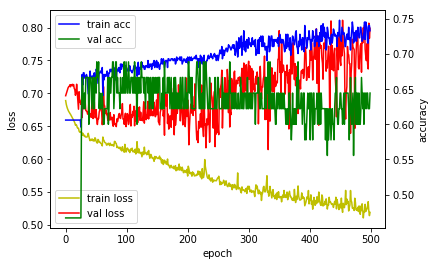

In [286]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='lower left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [287]:
model.predict(x_test)

array([[0.65038073],
       [0.65038085],
       [0.65038085],
       [0.0696725 ],
       [0.63663924],
       [0.63315207],
       [0.65038043],
       [0.6376047 ],
       [0.07288887],
       [0.6376047 ],
       [0.6218308 ],
       [0.63688594],
       [0.6376047 ],
       [0.08705162],
       [0.6376047 ],
       [0.6376047 ],
       [0.0770789 ],
       [0.06533373],
       [0.651142  ],
       [0.65038085],
       [0.6376047 ],
       [0.54050785],
       [0.6376047 ],
       [0.6376047 ],
       [0.6376047 ],
       [0.64949274],
       [0.6376047 ],
       [0.06589219],
       [0.637604  ],
       [0.6376047 ],
       [0.63643175],
       [0.6376047 ],
       [0.63750243],
       [0.6376047 ],
       [0.6376047 ],
       [0.06705147],
       [0.63751775],
       [0.6042282 ],
       [0.08968696],
       [0.6376047 ],
       [0.06499118],
       [0.6376047 ],
       [0.6503789 ],
       [0.60003746],
       [0.6376047 ],
       [0.07486031],
       [0.63755137],
       [0.626

In [288]:
pred = model.predict_classes(x_test)
live = len([x for x in pred.ravel() if x==1])
death = len([x for x in pred.ravel() if x==0])
print("live : " , live)
print("death : " , death)
print("생존율 : ", live / (live + death))
# pred

live :  341
death :  77
생존율 :  0.8157894736842105


In [289]:
df_pred = pd.read_csv("../data/titanic/gender_submission.csv")
df_pred[['Survived']] = pred
# df_pred

In [290]:
df_pred.to_csv('result.csv', index=False)